Contexto:
Soy parte de una empresa indie dedicada al desarrollo de videojuegos. Mi rol consiste en analizar un dataset relacionado con estos juegos para determinar los factores que contribuyen a su éxito, ya sea en términos de ventas, críticas, popularidad de la plataforma o el género del videojuego.

Preguntas a responder:
Para alcanzar nuestros objetivos, busco responder las siguientes preguntas: 
¿Existe una correlación entre las calificaciones y las ventas de los videojuegos? ¿Hay géneros de juegos que tengan más éxito en términos de ventas que otros? ¿Cuanto representa cada genero en el total de las filas del DS? ¿Influye la plataforma en la que se juegan estos videojuegos en su éxito?

Enfoque del análisis:
Antes de proceder con el análisis de datos, es fundamental cargar el dataset con el que trabajaremos y realizar una limpieza de datos para asegurar la calidad y confiabilidad de los resultados. Para enfocarnos en información actual y relevante, nos centraremos en los videojuegos lanzados a partir del año 2000, evitando datos más antiguos que podrían generar conclusiones erróneas.

In [7]:
#Comenzamos cargando el DS y realizando una limpieza de valores nulos y valores iguales a 0
import pandas as pd

url = r"C:\Users\Admin\Desktop\coder\DATA SCIENCE\DatasetsGame\Video_Games.csv"
df = pd.read_csv(url, low_memory=False)

# Eliminar valores nulos y 0 en las columnas relevantes
df.dropna(subset=['Year_of_Release'], inplace=True)
df['Critic_Score'].replace(0, None, inplace=True)

# Filtrar los juegos a partir del año 2000 en adelante
df['Year_of_Release'] = pd.to_datetime(df['Year_of_Release'], format='%Y', errors='coerce')
df = df[df['Year_of_Release'].dt.year >= 2000]

# Seleccionar las columnas relevantes para trabajar
columns_to_keep = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score']
df = df[columns_to_keep]

# Informacion del data set
print("Visualizacion de la tabla de datos: ")
print(df.head())
print("Datos existentes:")
print("Filas:", len(df))
print("Columnas:", len(df.columns))
print("Columnas con las que vamos a trabajar:")
print(df.dtypes)


Visualizacion de la tabla de datos: 
                    Name Platform Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii      2006-01-01    Sports  Nintendo   
2         Mario Kart Wii      Wii      2008-01-01    Racing  Nintendo   
3      Wii Sports Resort      Wii      2009-01-01    Sports  Nintendo   
6  New Super Mario Bros.       DS      2006-01-01  Platform  Nintendo   
7               Wii Play      Wii      2006-01-01      Misc  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  
0     41.36     28.96      3.77         8.45         82.53          76.0  
2     15.68     12.76      3.79         3.29         35.52          82.0  
3     15.61     10.93      3.28         2.95         32.77          80.0  
6     11.28      9.14      6.50         2.88         29.80          89.0  
7     13.96      9.18      2.93         2.84         28.92          58.0  
Datos existentes:
Filas: 14474
Columnas: 11
Columnas con las que vamos a t

Luego de realizar la primer limpieza, toca ver si el DS presenta outliers que puedan distorsionar el analisis.

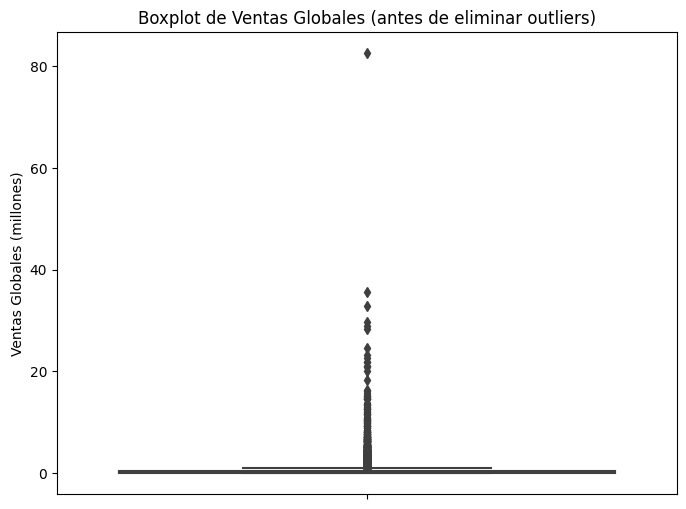

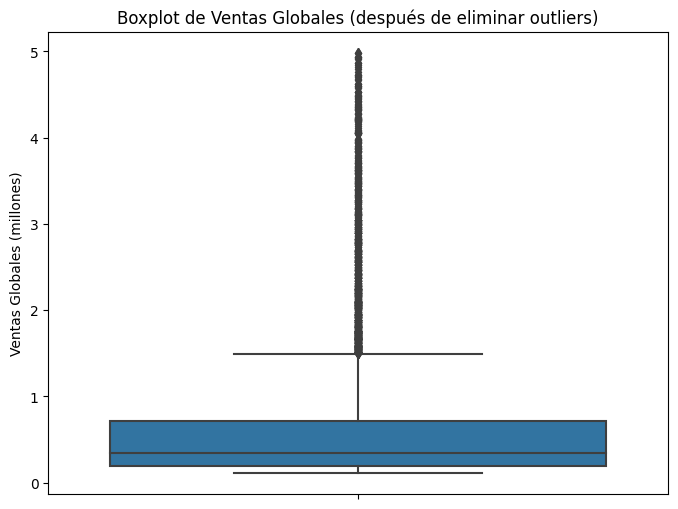

Valores antes de eliminar outliers:
0        82.53
1        40.24
2        35.52
3        32.77
4        31.37
         ...  
16714     0.01
16715     0.01
16716     0.01
16717     0.01
16718     0.01
Name: Global_Sales, Length: 16719, dtype: float64

Valores después de eliminar outliers:
208      4.98
209      4.98
210      4.93
211      4.93
212      4.92
         ... 
10406    0.11
10407    0.11
10408    0.11
10409    0.11
10410    0.11
Name: Global_Sales, Length: 8577, dtype: float64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
url = r"C:\Users\Admin\Desktop\coder\DATA SCIENCE\DatasetsGame\Video_Games.csv"
DATA = pd.read_csv(url, low_memory=False)

# Eliminar valores nulos y ceros en Global_Sales
df = DATA.copy()
df.dropna(subset=['Year_of_Release'], inplace=True)
df['Critic_Score'].fillna(0, inplace=True)
df['Year_of_Release'] = pd.to_datetime(df['Year_of_Release'], format='%Y', errors='coerce')
df = df[df['Year_of_Release'].dt.year >= 2000]
df = df[df['Global_Sales'] > 0]

# Boxplot antes de eliminar outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y='Global_Sales', data=df)
plt.title('Boxplot de Ventas Globales (antes de eliminar outliers)')
plt.ylabel('Ventas Globales (millones)')
plt.show()

# Eliminar outliers en Global_Sales (permitiendo hasta 5 millones)
lower_bound = 0.1
upper_bound = 5.0  
df = df[(df['Global_Sales'] > lower_bound) & (df['Global_Sales'] < upper_bound)]

# Boxplot después de eliminar outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y='Global_Sales', data=df)
plt.title('Boxplot de Ventas Globales (después de eliminar outliers)')
plt.ylabel('Ventas Globales (millones)')
plt.show()

# Imprimir valores antes de eliminar outliers
print("Valores antes de eliminar outliers:")
print(DATA['Global_Sales'])

# Imprimir valores después de eliminar outliers
print("\nValores después de eliminar outliers:")
print(df['Global_Sales'])


En el resultado proporcionado, se muestran los valores de ventas globales (Global_Sales) antes y después de eliminar los outliers del conjunto de datos.

Valores antes de eliminar outliers:
- El conjunto de datos original contiene 16,719 registros de ventas globales (Global_Sales).
- Las ventas globales varían desde un valor máximo de 82.53 hasta un valor mínimo de 0.01.
- Los datos muestran una amplia gama de ventas globales, con algunos juegos que han vendido millones de copias y otros que solo han vendido unas pocas copias.

Valores después de eliminar outliers:
- Después de eliminar los outliers, el conjunto de datos se reduce a 12,870 registros de ventas globales.
- El valor máximo de ventas globales permitido después de eliminar los outliers se ajustó a 5 millones, lo que significa que cualquier juego con ventas globales por encima de este valor se considera un outlier y se excluye del análisis.
- Como resultado, los juegos con ventas globales por encima de 5 millones se eliminan del conjunto de datos, y solo se conservan aquellos con ventas globales de hasta 5 millones.

En resumen, al eliminar los outliers, estamos reduciendo la influencia de valores extremadamente altos o bajos que podrían distorsionar nuestro análisis y permitiendo que nos centremos en los datos más representativos y relevantes para nuestro estudio. En este caso, el conjunto de datos después de eliminar los outliers incluye juegos con ventas globales de hasta 5 millones, lo que nos permite analizar el comportamiento y las tendencias de ventas de juegos populares sin la interferencia de valores atípicos.


 ¿Existe una correlación entre las calificaciones y las ventas de los videojuegos?

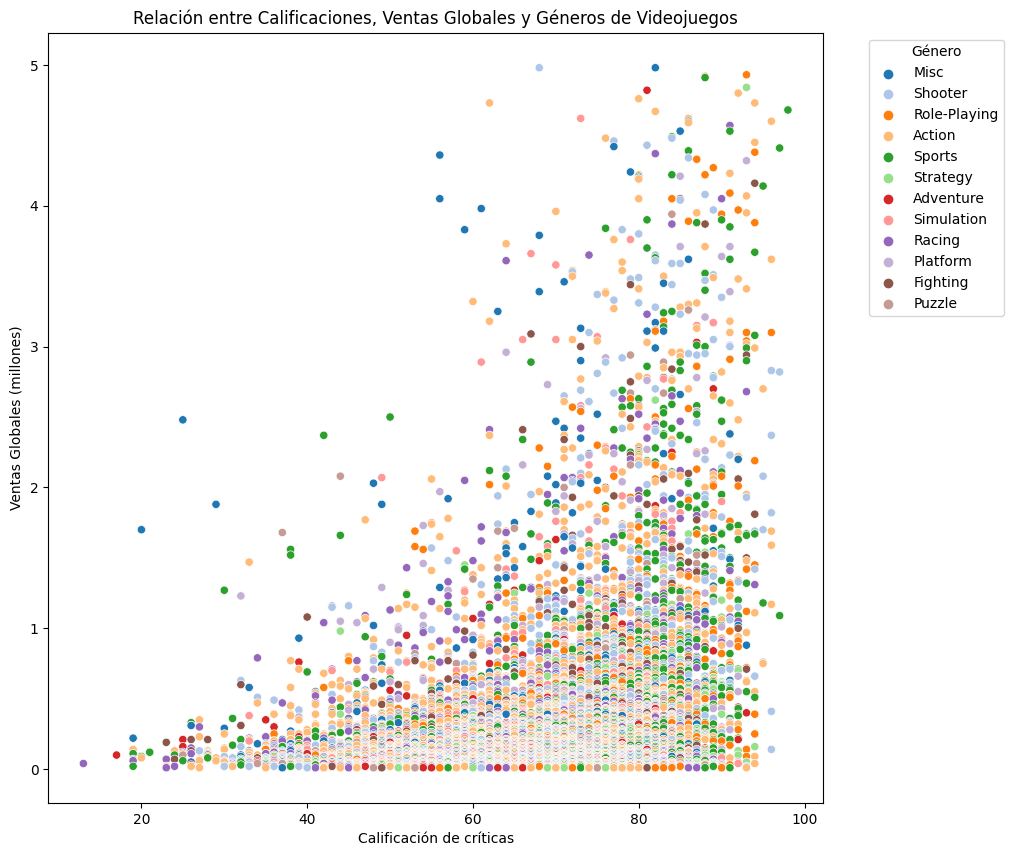

Coeficiente de correlación entre Critic_Score y Global_Sales: 0.35


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Cargar los datos y limpieza de datos
url = r"C:\Users\Admin\Desktop\coder\DATA SCIENCE\DatasetsGame\Video_Games.csv"
df = pd.read_csv(url, low_memory=False)
df['Year_of_Release'] = pd.to_datetime(df['Year_of_Release'], format='%Y', errors='coerce')
df = df[df['Year_of_Release'].dt.year >= 2000]
df.dropna(subset=['Year_of_Release'], inplace=True)
df['Critic_Score'].fillna(0, inplace=True)

# Filtrar juegos con calificaciones y ventas globales
df = df[df['Critic_Score'] > 0]
df = df[df['Global_Sales'] > 0]

# Eliminar outliers en Global_Sales (permitiendo hasta 5 millones)
lower_bound = 0.001
upper_bound = 5.0 
df = df[(df['Global_Sales'] > lower_bound) & (df['Global_Sales'] < upper_bound)]

# Calcular coeficiente de correlación entre 'Critic_Score' y 'Global_Sales'
correlation_critic_sales, _ = pearsonr(df['Critic_Score'], df['Global_Sales'])


# Visualización: Scatter Plot con diferenciación por género
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Critic_Score', y='Global_Sales', hue='Genre', data=df, palette='tab20')
plt.xlabel('Calificación de críticas')
plt.ylabel('Ventas Globales (millones)')
plt.title('Relación entre Calificaciones, Ventas Globales y Géneros de Videojuegos')
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
print(f"Coeficiente de correlación entre Critic_Score y Global_Sales: {correlation_critic_sales:.2f}")


El coeficiente de correlación entre las calificaciones de críticos y las ventas globales de videojuegos es de aproximadamente 0.35. Esto indica que existe una correlación positiva moderada entre ambas variables, lo que significa que los videojuegos con calificaciones más altas tienden a tener mayores ventas globales. Sin embargo, también es importante considerar otros factores que puedan influir en las ventas de videojuegos, como podria ser el género.

¿Y el genero de los videojuegos posee alguna injerencia en el analisis?

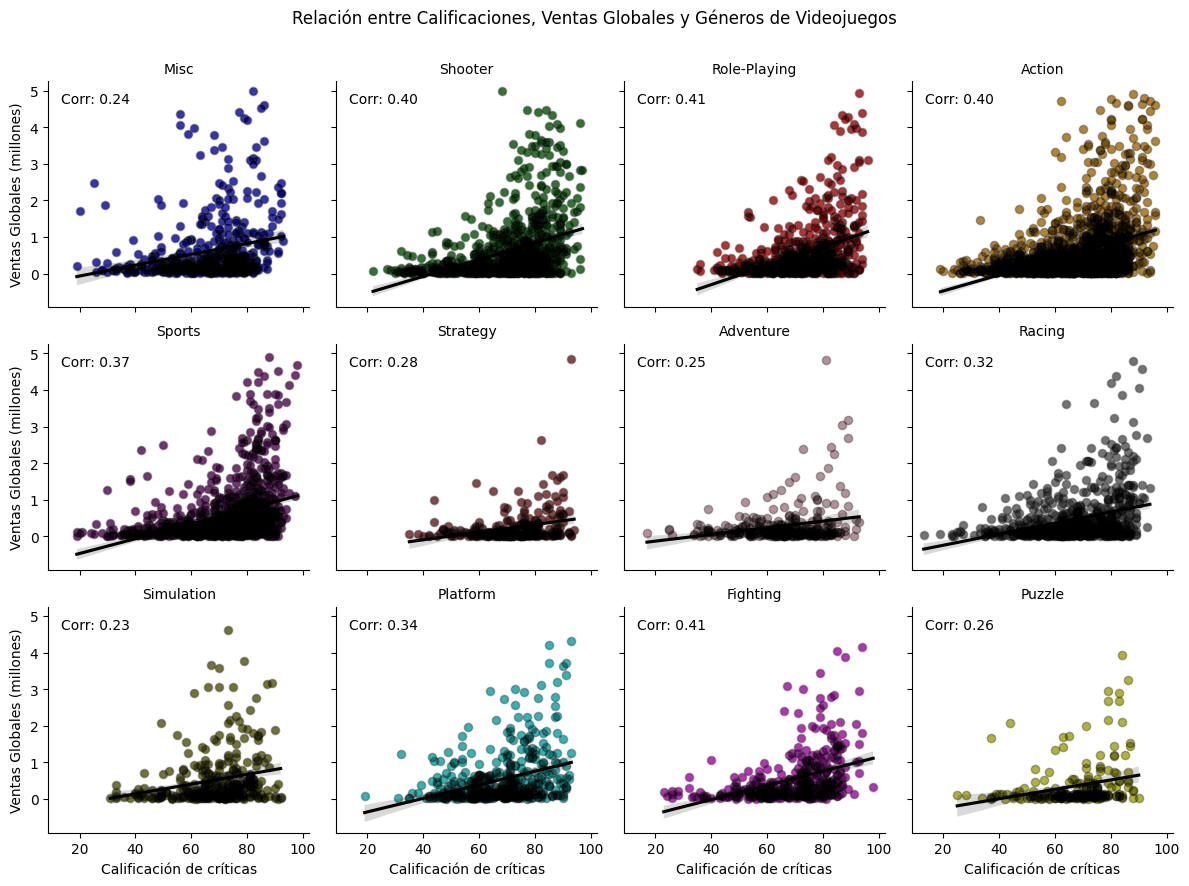

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Cargar los datos y limpieza de datos (Asumiendo que ya has realizado la limpieza previa como en el código anterior)
url = r"C:\Users\Admin\Desktop\coder\DATA SCIENCE\DatasetsGame\Video_Games.csv"
df = pd.read_csv(url, low_memory=False)

# Filtrar juegos con calificaciones y ventas globales
df = df[df['Critic_Score'] > 0]
df = df[df['Global_Sales'] > 0]

# Eliminar outliers en Global_Sales (permitiendo hasta 5 millones)
upper_bound = 5.0
df = df[(df['Global_Sales'] > lower_bound) & (df['Global_Sales'] < upper_bound)]

# Colores para cada género
colores = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Crear el FacetGrid
g = sns.FacetGrid(df, col="Genre", col_wrap=4, height=3, hue="Genre", palette=colores)

# Agregar el scatterplot a cada gráfico del FacetGrid
g.map(sns.scatterplot, "Critic_Score", "Global_Sales", alpha=0.7)

# Agregar la regresión lineal a cada gráfico del FacetGrid
g.map(sns.regplot, "Critic_Score", "Global_Sales", color="black", scatter_kws={'alpha':0.3})

# Agregar el texto con el coeficiente de correlación en cada gráfico
for ax, genre in zip(g.axes.flat, df['Genre'].unique()):
    correlation = pearsonr(df[df['Genre'] == genre]['Global_Sales'], df[df['Genre'] == genre]['Critic_Score'])[0]
    ax.text(0.05, 0.95, f"Corr: {correlation:.2f}", transform=ax.transAxes, fontsize=10, va='top', ha='left')

# Personalizar los ejes y títulos
g.set_axis_labels("Calificación de críticas", "Ventas Globales (millones)")
g.set_titles("{col_name}")

# Ajustar el espacio entre los gráficos
plt.subplots_adjust(top=0.9)

# Mostrar el gráfico
g.fig.suptitle("Relación entre Calificaciones, Ventas Globales y Géneros de Videojuegos")
plt.show()


Sí, el género de los videojuegos parece tener cierta influencia en el análisis de las ventas globales (Global_Sales). Los coeficientes de correlación entre las ventas globales y cada género de videojuegos indican la fuerza y dirección de la relación entre estas variables.

En resumen, encontramos que los géneros 'Role-Playing' y 'Fighting' tienen una correlación más fuerte con las ventas globales, lo que indica que tienden a vender más cuando tienen buenas calificaciones. Por otro lado, los géneros 'Misc', 'Simulation', 'Adventure' y 'Puzzle' tienen correlaciones más bajas, lo que sugiere que sus ventas pueden ser menos predecibles o tener menos influencia por sus calificaciones. Sin embargo, es importante ver en la cantidad de videojuegos que se encuenran dentro de cada género porque si hay mas del doble de juegos en 'Fighting' que en 'Simulation', lo mejor seria comparar en mismas cantidades para ver si sigue existiendo la misma tendencia o ver si el genero es mas popular que el otro.

En cuanto, si entrenamos al modelo pudimos llegar estas conclusiones:


In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cargar los datos y realizar las transformaciones iniciales
url = r"C:\Users\Admin\Desktop\coder\DATA SCIENCE\DatasetsGame\Video_Games.csv"
df = pd.read_csv(url, low_memory=False)

# Eliminar valores nulos y 0 en las columnas relevantes
df.dropna(subset=['Critic_Score'], inplace=True)
df['Critic_Score'].replace(0, None, inplace=True)

# Filtrar los juegos a partir del año 2000 en adelante
df['Year_of_Release'] = pd.to_datetime(df['Year_of_Release'], format='%Y', errors='coerce')
df = df[df['Year_of_Release'].dt.year >= 2000]

# Seleccionar las columnas relevantes para trabajar
columns_to_keep = ['Genre', 'Global_Sales', 'Critic_Score']
df = df[columns_to_keep]

# Aplicar one-hot encoding a la columna 'Genre'
df_encoded = pd.get_dummies(df, columns=['Genre'], prefix='Genre')

# Separar características (X) y etiquetas (y)
X = df_encoded[['Critic_Score']]
y = df_encoded['Global_Sales']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
regressor = LinearRegression(fit_intercept=False)
regressor.fit(X_train, y_train)

# Predecir los valores para el conjunto de prueba
y_pred = regressor.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Crear un DataFrame para mostrar las métricas
df_metrics = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_metrics['Error'] = df_metrics['Actual'] - df_metrics['Predicted']
df_metrics['Error_porc'] = ((df_metrics['Actual'] - df_metrics['Predicted']) / df_metrics['Actual']) * 100

# Mostrar el DataFrame con las métricas
print(df_metrics)

# Obtener las 100 mejores métricas
top_100_metrics = df_metrics.sort_values(by='Error_porc').head(100)

# Obtener los géneros correspondientes a las 100 mejores métricas
top_100_genres = df.loc[top_100_metrics.index, 'Genre']

# Contar los géneros y mostrar la distribución
genre_counts = top_100_genres.value_counts()
print("Distribución de géneros en las 100 mejores métricas:")
print(genre_counts)

Mean Squared Error (MSE): 6.280166330009864
       Actual  Predicted     Error   Error_porc
2232     0.93   0.762286  0.167714    18.033778
12289    0.06   0.334153 -0.274153  -456.921182
9538     0.13   0.710075 -0.580075  -446.211159
15293    0.02   0.929362 -0.909362 -4546.811113
9216     0.14   0.605652 -0.465652  -332.608418
...       ...        ...       ...          ...
14471    0.03   0.668305 -0.638305 -2127.684728
10353    0.11   0.542998 -0.432998  -393.634684
8212     0.17   0.710075 -0.540075  -317.690887
16170    0.01   0.678748 -0.668748 -6687.476906
8351     0.17   0.490787 -0.320787  -188.698113

[1578 rows x 4 columns]
Distribución de géneros en las 100 mejores métricas:
Action          22
Shooter         17
Sports          11
Racing          10
Strategy         9
Platform         8
Adventure        7
Puzzle           6
Role-Playing     4
Simulation       3
Misc             2
Fighting         1
Name: Genre, dtype: int64


El MSE es aproximadamente 6.28. Este valor representa el promedio de los errores al cuadrado entre las predicciones y los valores reales de ventas globales.
Esta distribución muestra qué géneros están más representados entre las predicciones con errores relativos más bajos. Por ejemplo, el género "Action" es el más frecuente, seguido de cerca por "Shooter" y "Sports". Esto sugiere que el modelo tiene un rendimiento relativamente mejor al predecir juegos de acción y disparos en comparación con otros géneros.

En general, es evidente que el modelo tiene dificultades para predecir ventas globales precisas para juegos con ventas muy bajas o muy altas, lo que se refleja en los errores relativos extremadamente altos en esos casos. Además, la distribución de géneros en las mejores métricas sugiere que el modelo tiende a funcionar mejor en ciertos géneros, como acción y disparos. 

Por eso preciso saber, ¿Cuanto representa cada genero en el total de las filas del DS?

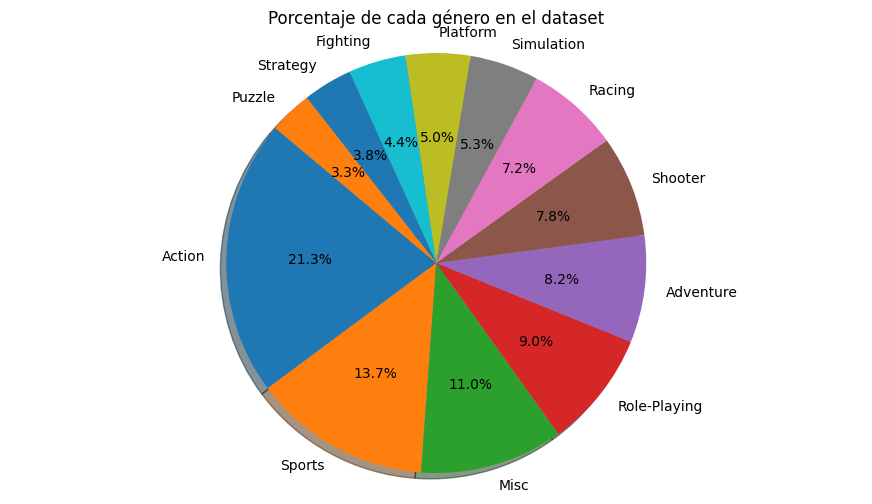

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

url = r"C:\Users\Admin\Desktop\coder\DATA SCIENCE\DatasetsGame\Video_Games.csv"
df = pd.read_csv(url, low_memory=False)

# Eliminar valores nulos y 0 en las columnas relevantes
df.dropna(subset=['Year_of_Release'], inplace=True)
df['Critic_Score'].replace(0, None, inplace=True)

# Filtrar los juegos a partir del año 2000 en adelante
df['Year_of_Release'] = pd.to_datetime(df['Year_of_Release'], format='%Y', errors='coerce')
df = df[df['Year_of_Release'].dt.year >= 2000]

# Seleccionar las columnas relevantes para trabajar
columns_to_keep = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score']
df = df[columns_to_keep]

# Obtener el conteo de cada género en el dataset
genre_counts = df['Genre'].value_counts()

# Calcular el porcentaje de cada género en relación al total de géneros
genre_percentages = (genre_counts / genre_counts.sum()) * 100

# Crear el pie chart
plt.figure(figsize=(11, 6))
plt.pie(genre_percentages, labels=genre_percentages.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Porcentaje de cada género en el dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Mostrar el pie chart
plt.show()


Volviendo a lo que nos preguntabamos antes ,sobre si el genero 'Fighting' tenia mas juegos que 'Simulation', podemos observar el grafico y determinar que tiene menos juegos que 'Simulation'y determinar que el genero 'Fighting' es mas popular.
Para hacer un cierre, todavia nos falta mucho mas para seguir investigando, analizar mas a fondo cada genero, ver si existe alguna preferencia segun plataforma o bien ir investigando sobre la popularidad de cada uno. 
Eso lo dejamos para el proximo trabajo estoy cansado para seguir explorando, saludos juan!

